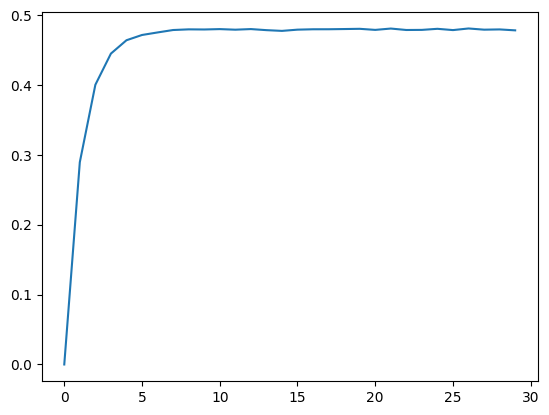

In [61]:
import numpy as np
import ucamcl
import matplotlib.pyplot as plt


def q6():
    return 12/25

def mobility(v,w):
    assert(len(v) == len(w))
    OldBins = np.percentile(v, np.array([20, 40, 60, 80, 100]))
    OldQuintiles = np.digitize(v, OldBins, True)
    NewBins = np.percentile(w, np.array([20, 40, 60, 80, 100]))
    NewQuintiles = np.digitize(w, NewBins, True)
    Delta = np.subtract(NewQuintiles, OldQuintiles)    
    MovedMultipleQuintilesCount = np.sum(np.where(abs(Delta) >= 2, 1, 0))
    return MovedMultipleQuintilesCount / len(v)


def pairs(N):
    assert(N%2 == 0)
    SourceArray = np.arange(0, N)
    np.random.shuffle(SourceArray)    
    return (SourceArray[:N//2], SourceArray[N//2:])

def kinetic_exchange(v, w):
    R = np.random.rand(len(v))
    InverseR = np.subtract(np.ones(len(R)), R)
    Sum = np.add(v, w)
    return (np.multiply(R, Sum), np.multiply(InverseR, Sum))

def gini(w):
    Top = np.cumsum(np.multiply(np.arange(1, len(w)+1), np.sort(w)))[len(w) - 1]
    Bottom = np.cumsum(w)[len(w) - 1]
    return (2 / len(w)) *  (Top / Bottom) - 1 - 1 / len(w)

def simPeriod(N, T):
    Wealths = np.ones(N)
    GiniCoefficients = np.empty(T)
    for i in range(T):
        Pairings = pairs(N)
        V = np.take(Wealths, Pairings[0])
        W = np.take(Wealths, Pairings[1])
        newV, newW = kinetic_exchange(V, W)
        np.put(Wealths, Pairings[0], newV)
        np.put(Wealths, Pairings[1], newW)
        GiniCoefficients[i] = gini(Wealths)
    
    return (Wealths, GiniCoefficients)

def simPeriod(W, Gs, T):
    Wealths = np.copy(W)
    GiniCoefficients = np.append(Gs, np.empty(T))
    for i in range(T):
        Pairings = pairs(len(Wealths))
        V = np.take(Wealths, Pairings[0])
        W = np.take(Wealths, Pairings[1])
        newV, newW = kinetic_exchange(V, W)
        np.put(Wealths, Pairings[0], newV)
        np.put(Wealths, Pairings[1], newW)
        GiniCoefficients[i + len(Gs)] = gini(Wealths)
        
    return (Wealths, GiniCoefficients)

def simStable(N):
    Wealths = np.ones(N)
    GiniCoefficients = np.array([])
    Sxx = 10
    #0.00004
    while (Sxx > 0.00002):
        Pairings = pairs(N)
        V = np.take(Wealths, Pairings[0])
        W = np.take(Wealths, Pairings[1])
        newV, newW = kinetic_exchange(V, W)
        np.put(Wealths, Pairings[0], newV)
        np.put(Wealths, Pairings[1], newW)
        GiniCoefficients = np.append(GiniCoefficients, gini(Wealths))
        if (len(GiniCoefficients) > 10):
            Mean = np.sum(GiniCoefficients[len(GiniCoefficients) - 10:]) / 10
            Differences = np.subtract(GiniCoefficients[len(GiniCoefficients) - 10:], Mean)
            Sxx = np.sum(np.multiply(Differences, Differences))
            
    return (Wealths, GiniCoefficients)

def q8():
    GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2')
    q = GRADER.fetch_question('q8')
    WT, Gs = simStable(q.n)
    WTt, Gst = simPeriod(WT, Gs, q.t)
    plt.plot(range(1, len(Gst) + 1), Gst)
    plt.plot(range(1, len(Gs) + 1), Gs)
    Result = mobility(WT, WTt)
    print(Result)
    # For a population size q.n, measure mobility over from time T to time T+q.t
    GRADER.submit_answer(q, Result)
    
def q9():
    WT, Gs = simStable(500000)
    ts = np.arange(0, 30)
    
    #SimFunc = np.vectorize(lambda t: simPeriod(WT, Gs, t)[0])    
    #WTt = SimFunc(ts) 
    WTt = []#np.empty(len(ts))
    for i in range(len(ts)):
        WTt.append(simPeriod(WT, Gs, i)[0])     
        
    #MobFunc = np.vectorize(lambda t: mobility(WT, t))
    Mobilities = []
    for i in range(len(ts)):
        Mobilities.append(mobility(WT, WTt[i]))
        
    plt.plot(range(0, len(ts)), Mobilities)

q9()